In [2]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats

In [3]:
"test"[:-2]

'te'

In [4]:
df = pd.read_csv("core_data_nyc/median_household_income_by_tract.csv")

In [5]:
df_tracts = pd.read_csv("core_data_nyc/census_tract_to_nta.csv")

In [6]:
df_tracts.NTACode.nunique()

195

In [7]:
df_tracts

,the_geom,BoroName,CTLabel,BoroCode,BoroCT2010,CT2010,CDEligibil,NTACode,NTAName,Shape_Leng,PUMA,Shape_Area
0,MULTIPOLYGON (((-74.07920577013245 40.64343078...,Staten Island,9.00,5,5000900,900,I,SI22,West New Brighton-New Brighton-St. George,7729.016794,3903,2.497010e+06
1,MULTIPOLYGON (((-73.96432543478758 40.75638153...,Manhattan,98.00,1,1009800,9800,I,MN19,Turtle Bay-East Midtown,5534.199811,3808,1.906016e+06
2,MULTIPOLYGON (((-73.96802436915851 40.75957814...,Manhattan,100.00,1,1010000,10000,I,MN19,Turtle Bay-East Midtown,5692.168737,3808,1.860938e+06
3,MULTIPOLYGON (((-73.97124277307127 40.76093641...,Manhattan,102.00,1,1010200,10200,I,MN17,Midtown-Midtown South,5687.802439,3807,1.860993e+06
4,MULTIPOLYGON (((-73.97445730550224 40.76229308...,Manhattan,104.00,1,1010400,10400,I,MN17,Midtown-Midtown South,5693.036367,3807,1.864600e+06
5,MULTIPOLYGON (((-73.98411754823195 40.75484205...,Manhattan,113.00,1,1011300,11300,I,MN17,Midtown-Midtown South,5699.860641,3807,1.890907e+06
6,MULTIPOLYGON (((-73.96475544914023 40.76405707...,Manhattan,114.02,1,1011402,11402,I,MN40,Upper East Side-Carnegie Hill,4125.256029,3805,1.063547e+06
7,MULTIPOLYGON (((-73.96147581181627 40.77432401...,Manhattan,130.00,1,1013000,13000,I,MN40,Upper East Side-Carnegie Hill,5807.972956,3805,1.918145e+06
8,MULTIPOLYGON (((-73.95494520074165 40.77750394...,Manhattan,140.00,1,1014000,14000,I,MN40,Upper East Side-Carnegie Hill,5820.815640,3805,1.925984e+06
9,MULTIPOLYGON (((-73.95398370221397 40.77882211...,Manhattan,148.01,1,1014801,14801,I,MN40,Upper East Side-Carnegie Hill,3135.951423,3805,5.592162e+05


In [8]:
df_tracts_to_nta = df_tracts[["BoroCT2010", "NTACode","NTAName"]]

In [14]:
df_tracts_to_nta[["BoroCT2010_str"]] = df_tracts_to_nta[["BoroCT2010"]].astype(str)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [18]:
df_tracts_to_nta["BoroCT2010_str"].str[-6:]

0       000900
1       009800
2       010000
3       010200
4       010400
5       011300
6       011402
7       013000
8       014000
9       014801
10      018400
11      019000
12      020600
13      024900
14      026100
15      026300
16      026700
17      026900
18      027700
19      000501
20      002000
21      004100
22      005800
23      006000
24      006700
25      006900
26      007400
27      007600
28      007800
29      008000
         ...  
2136    000301
2137    000700
2138    004700
2139    005100
2140    054900
2141    055100
2142    044900
2143    059300
2144    005300
2145    039800
2146    005900
2147    009700
2148    010300
2149    019900
2150    007800
2151    020500
2152    015602
2153    017011
2154    006400
2155    103202
2156    008000
2157    007000
2158    101001
2159    138501
2160    147100
2161    003700
2162    004900
2163    006300
2164    007100
2165    007300
Name: BoroCT2010_str, Length: 2166, dtype: object

In [19]:
df_tracts_to_nta['merge_identifier'] = df_tracts_to_nta["BoroCT2010_str"]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [20]:
df_tracts_to_nta.merge_identifier.nunique()

2166

In [21]:
df_tracts_to_nta

,BoroCT2010,NTACode,NTAName,BoroCT2010_str,merge_identifier
0,5000900,SI22,West New Brighton-New Brighton-St. George,5000900,5000900
1,1009800,MN19,Turtle Bay-East Midtown,1009800,1009800
2,1010000,MN19,Turtle Bay-East Midtown,1010000,1010000
3,1010200,MN17,Midtown-Midtown South,1010200,1010200
4,1010400,MN17,Midtown-Midtown South,1010400,1010400
5,1011300,MN17,Midtown-Midtown South,1011300,1011300
6,1011402,MN40,Upper East Side-Carnegie Hill,1011402,1011402
7,1013000,MN40,Upper East Side-Carnegie Hill,1013000,1013000
8,1014000,MN40,Upper East Side-Carnegie Hill,1014000,1014000
9,1014801,MN40,Upper East Side-Carnegie Hill,1014801,1014801


In [22]:
df_tracts_to_nta.NTACode.nunique()

195

In [23]:
df_tracts_to_nta.NTACode.unique()

array(['SI22', 'MN19', 'MN17', 'MN40', 'MN34', 'MN11', 'MN03', 'MN36',
       'MN35', 'BK09', 'BK32', 'BK38', 'BK31', 'BK33', 'BK34', 'BK88',
       'BK30', 'BK37', 'BK27', 'BK28', 'BK69', 'BK61', 'BK75', 'BK35',
       'BK78', 'BK29', 'BK63', 'BK60', 'BK21', 'BK79', 'BK25', 'BK77',
       'BK46', 'BK43', 'BK42', 'BK90', 'BK76', 'BK73', 'BK72', 'BK44',
       'BK17', 'BK45', 'BK58', 'BK91', 'BK95', 'BK96', 'BK81', 'BK50',
       'BX31', 'BK82', 'BK85', 'BK83', 'BX39', 'BX09', 'BX55', 'BX27',
       'BX35', 'BX33', 'BX14', 'BX52', 'BX99', 'BX59', 'BX08', 'BX63',
       'QN55', 'BX37', 'BX36', 'BX49', 'BX29', 'BX07', 'BX17', 'BX44',
       'BX05', 'BX28', 'BX43', 'BX62', 'QN53', 'QN54', 'QN68', 'QN70',
       'QN71', 'QN72', 'QN60', 'QN31', 'QN76', 'QN35', 'QN63', 'QN01',
       'QN29', 'QN28', 'QN08', 'QN27', 'QN25', 'QN26', 'QN61', 'QN20',
       'QN50', 'QN30', 'QN34', 'QN07', 'QN33', 'QN19', 'QN21', 'QN05',
       'QN18', 'QN17', 'QN37', 'QN62', 'QN22', 'QN52', 'QN51', 'QN10',
      

In [24]:
df.shape

(2167, 5)

In [25]:
df.head()

,short_name,long_name,Census Tract,2007-2011,2012-2016
0,hh_inc_med_adj,Median household income ($2017),36061020901,26868.476413,22646.768705
1,hh_inc_med_adj,Median household income ($2017),36061021000,37333.166423,30517.876863
2,hh_inc_med_adj,Median household income ($2017),36061021100,56176.979469,47939.330891
3,hh_inc_med_adj,Median household income ($2017),36061021200,60259.227509,55064.111177
4,hh_inc_med_adj,Median household income ($2017),36061021303,46358.338272,37478.505800


In [26]:
df[["census_tract_str"]] = df[["Census Tract"]].astype(str)

In [27]:
df['merge_identifier']=df['census_tract_str'].str[4:]

In [28]:
df.merge_identifier.nunique()

1994

In [29]:
df['Census Tract'].nunique()

2167

In [30]:
df_new2 = df.merge(df_tracts_to_nta, how = 'left', on = 'merge_identifier')

In [31]:
df_new2

,short_name,long_name,Census Tract,2007-2011,2012-2016,census_tract_str,merge_identifier,BoroCT2010,NTACode,NTAName,BoroCT2010_str
0,hh_inc_med_adj,Median household income ($2017),36061020901,26868.476413,22646.768705,36061020901,1020901,1020901.0,MN09,Morningside Heights,1020901
1,hh_inc_med_adj,Median household income ($2017),36061021000,37333.166423,30517.876863,36061021000,1021000,1021000.0,MN34,East Harlem North,1021000
2,hh_inc_med_adj,Median household income ($2017),36061021100,56176.979469,47939.330891,36061021100,1021100,1021100.0,MN09,Morningside Heights,1021100
3,hh_inc_med_adj,Median household income ($2017),36061021200,60259.227509,55064.111177,36061021200,1021200,1021200.0,MN03,Central Harlem North-Polo Grounds,1021200
4,hh_inc_med_adj,Median household income ($2017),36061021303,46358.338272,37478.505800,36061021303,1021303,1021303.0,MN06,Manhattanville,1021303
5,hh_inc_med_adj,Median household income ($2017),36061021400,39135.816049,52546.783969,36061021400,1021400,1021400.0,MN03,Central Harlem North-Polo Grounds,1021400
6,hh_inc_med_adj,Median household income ($2017),36061021500,34551.687806,32015.630475,36061021500,1021500,1021500.0,MN03,Central Harlem North-Polo Grounds,1021500
7,hh_inc_med_adj,Median household income ($2017),36061021600,42641.389645,60837.956448,36061021600,1021600,1021600.0,MN11,Central Harlem South,1021600
8,hh_inc_med_adj,Median household income ($2017),36061021703,NaN,NaN,36061021703,1021703,1021703.0,MN06,Manhattanville,1021703
9,hh_inc_med_adj,Median household income ($2017),36061021800,43421.851299,49376.929660,36061021800,1021800,1021800.0,MN11,Central Harlem South,1021800


In [32]:
df_new2.shape

(2167, 11)

In [33]:
df_new2['NTACode'].nunique()

48

In [34]:
df_median_household_income = pd.read_csv("core_data_nyc/median_household_income_by_tract.csv")

In [35]:
df_median_household_income['Census Tract'].nunique()

2167

In [36]:
df_median_household_income

,short_name,long_name,Census Tract,2007-2011,2012-2016
0,hh_inc_med_adj,Median household income ($2017),36061020901,26868.476413,22646.768705
1,hh_inc_med_adj,Median household income ($2017),36061021000,37333.166423,30517.876863
2,hh_inc_med_adj,Median household income ($2017),36061021100,56176.979469,47939.330891
3,hh_inc_med_adj,Median household income ($2017),36061021200,60259.227509,55064.111177
4,hh_inc_med_adj,Median household income ($2017),36061021303,46358.338272,37478.505800
5,hh_inc_med_adj,Median household income ($2017),36061021400,39135.816049,52546.783969
6,hh_inc_med_adj,Median household income ($2017),36061021500,34551.687806,32015.630475
7,hh_inc_med_adj,Median household income ($2017),36061021600,42641.389645,60837.956448
8,hh_inc_med_adj,Median household income ($2017),36061021703,NaN,NaN
9,hh_inc_med_adj,Median household income ($2017),36061021800,43421.851299,49376.929660


In [37]:
df_median_household_income.head()

,short_name,long_name,Census Tract,2007-2011,2012-2016
0,hh_inc_med_adj,Median household income ($2017),36061020901,26868.476413,22646.768705
1,hh_inc_med_adj,Median household income ($2017),36061021000,37333.166423,30517.876863
2,hh_inc_med_adj,Median household income ($2017),36061021100,56176.979469,47939.330891
3,hh_inc_med_adj,Median household income ($2017),36061021200,60259.227509,55064.111177
4,hh_inc_med_adj,Median household income ($2017),36061021303,46358.338272,37478.505800


In [38]:
db_test = pd.read_csv("core_data_nyc/nta_neighborhood_census_tract.csv")

In [39]:
db_test.head()

,Borough,2010 Census Bureau FIPS County Code,2010 NYC Borough Code,2010 Census Tract,PUMA,Neighborhood Tabulation Area (NTA)Code,Neighborhood Tabulation Area (NTA) Name
0,Bronx,5,2,31000,3704,BX31,Allerton-Pelham Gardens
1,Bronx,5,2,31200,3704,BX31,Allerton-Pelham Gardens
2,Bronx,5,2,31400,3704,BX31,Allerton-Pelham Gardens
3,Bronx,5,2,31600,3704,BX31,Allerton-Pelham Gardens
4,Bronx,5,2,31800,3704,BX31,Allerton-Pelham Gardens


In [42]:
db_crime_nta['Community District'].unique()

NameError: name 'db_crime_nta' is not defined

In [43]:
db_crime_nta['Community District'].str[:5]

NameError: name 'db_crime_nta' is not defined

In [ ]:
db_crime_nta['borough'] = db_crime_nta['Community District'].str[:2]

In [44]:
db_rent_tract = pd.read_csv("core_data_nyc/median_rent_by_tract.csv")

In [45]:
db_rent_tract['Census Tract'].nunique()

2167

In [46]:
df_median_household_income['Census Tract'].nunique()

2167

In [47]:
db_rent_tract.head()

,short_name,long_name,Census Tract,2007-2011,2012-2016
0,rent_gross_med_adj,"Median rent, all ($2017)",36005025100,1166.356583,1085.845879
1,rent_gross_med_adj,"Median rent, all ($2017)",36005025200,1157.684787,1424.344313
2,rent_gross_med_adj,"Median rent, all ($2017)",36005025300,1038.447590,1183.724944
3,rent_gross_med_adj,"Median rent, all ($2017)",36005025400,1127.333500,1358.072029
4,rent_gross_med_adj,"Median rent, all ($2017)",36005025500,1063.379004,1079.728438


In [48]:
db_rent_tract['median_rent_07_to_11'] = db_rent_tract['2007-2011']

In [49]:
db_rent_tract['median_rent_12_to_16'] = db_rent_tract['2012-2016']

In [50]:
db_rent_tract['census_tract'] = db_rent_tract['Census Tract']

In [51]:
df_rent = db_rent_tract[['census_tract','median_rent_07_to_11', 'median_rent_12_to_16']]

In [52]:
df_rent.shape

(2167, 3)

In [53]:
df_rent.head()

,census_tract,median_rent_07_to_11,median_rent_12_to_16
0,36005025100,1166.356583,1085.845879
1,36005025200,1157.684787,1424.344313
2,36005025300,1038.447590,1183.724944
3,36005025400,1127.333500,1358.072029
4,36005025500,1063.379004,1079.728438


In [54]:
df_median_household_income.head()

,short_name,long_name,Census Tract,2007-2011,2012-2016
0,hh_inc_med_adj,Median household income ($2017),36061020901,26868.476413,22646.768705
1,hh_inc_med_adj,Median household income ($2017),36061021000,37333.166423,30517.876863
2,hh_inc_med_adj,Median household income ($2017),36061021100,56176.979469,47939.330891
3,hh_inc_med_adj,Median household income ($2017),36061021200,60259.227509,55064.111177
4,hh_inc_med_adj,Median household income ($2017),36061021303,46358.338272,37478.505800


In [55]:
df_median_household_income['census_tract'] = df_median_household_income['Census Tract']

In [56]:
df_median_household_income['median_income_07_to_11'] = df_median_household_income['2007-2011']

In [57]:
df_median_household_income['median_income_12_to_16'] = df_median_household_income['2012-2016']

In [58]:
df_income = df_median_household_income[['census_tract','median_income_07_to_11', 'median_income_12_to_16']]

In [59]:
df_income.shape

(2167, 3)

In [60]:
df_combined = df_income.merge(df_rent, on='census_tract')

In [61]:
df_combined

,census_tract,median_income_07_to_11,median_income_12_to_16,median_rent_07_to_11,median_rent_12_to_16
0,36061020901,26868.476413,22646.768705,558.246877,820.756744
1,36061021000,37333.166423,30517.876863,757.698189,946.164297
2,36061021100,56176.979469,47939.330891,1029.775793,1140.902853
3,36061021200,60259.227509,55064.111177,1142.509143,1532.419114
4,36061021303,46358.338272,37478.505800,1057.959131,1258.153817
5,36061021400,39135.816049,52546.783969,985.332838,1186.783665
6,36061021500,34551.687806,32015.630475,922.462316,1118.472234
7,36061021600,42641.389645,60837.956448,1021.103997,1200.038122
8,36061021703,NaN,NaN,NaN,NaN
9,36061021800,43421.851299,49376.929660,1126.249526,1207.175137


In [62]:
#df_combined.to_csv("core_data_nyc/median_rent_and_income_by_tract.csv")

In [63]:
model = smf.ols(formula='median_income_07_to_11 ~ median_rent_07_to_11', data=df_combined).fit()

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


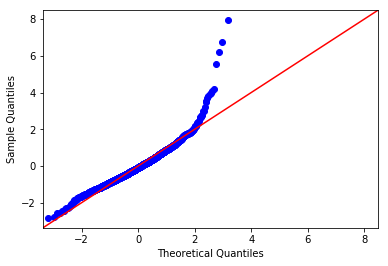

In [64]:
residual = model.resid
fig = sm.graphics.qqplot(residual, dist=stats.norm, line='45', fit=True)
fig.show()

In [65]:
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(model.resid, model.model.exog)
list(zip(name, test))

[('F statistic', 1.3136940504759202), ('p-value', 0.00015517207744427015)]

In [66]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     median_income_07_to_11   R-squared:                       0.608
Model:                                OLS   Adj. R-squared:                  0.607
Method:                     Least Squares   F-statistic:                     2175.
Date:                    Wed, 06 Mar 2019   Prob (F-statistic):          1.22e-287
Time:                            22:06:28   Log-Likelihood:                -15448.
No. Observations:                    1407   AIC:                         3.090e+04
Df Residuals:                        1405   BIC:                         3.091e+04
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -1.491e+04   1437.344    -10.374      0.000   -1.77e+04   -1.21e+04
median_rent_07_to_11    53.3946      1.145     46.636      0.000      51.149      55.641
==============================================================================
Omnibus:                      443.114   Durbin-Watson:                   1.478
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2753.626
Skew:                           1.317   Prob(JB):                         0.00
Kurtosis:                       9.327   Cond. No.                     4.77e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
model2 = smf.ols(formula='median_income_07_to_11 ~ median_rent_07_to_11', 
                 data=df_combined.sort_values(by=['median_income_07_to_11'])[:-300]).fit()

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


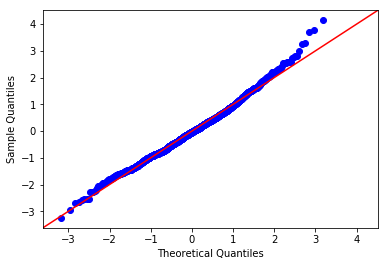

In [68]:
residual2 = model2.resid
fig = sm.graphics.qqplot(residual2, dist=stats.norm, line='45', fit=True)
fig.show()

In [69]:
df_combined.shape

(2167, 5)

In [70]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     median_income_07_to_11   R-squared:                       0.542
Model:                                OLS   Adj. R-squared:                  0.542
Method:                     Least Squares   F-statistic:                     1571.
Date:                    Wed, 06 Mar 2019   Prob (F-statistic):          2.62e-227
Time:                            22:06:33   Log-Likelihood:                -14296.
No. Observations:                    1329   AIC:                         2.860e+04
Df Residuals:                        1327   BIC:                         2.861e+04
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -3397.5032   1286.358     -2.641      0.008   -5921.021    -873.985
median_rent_07_to_11    42.1766      1.064     39.633      0.000      40.089      44.264
==============================================================================
Omnibus:                       32.161   Durbin-Watson:                   1.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.794
Skew:                           0.339   Prob(JB):                     1.69e-08
Kurtosis:                       3.433   Cond. No.                     4.98e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.98e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [86]:
model3 = smf.ols(formula='median_income_07_to_11 ~ median_rent_07_to_11+median_rent_07_to_11 ** 2', 
                 data=df_combined).fit()

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


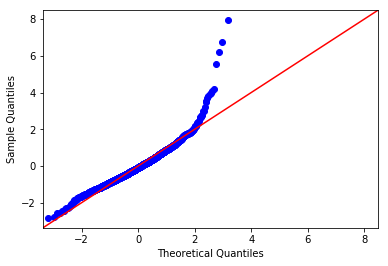

In [87]:
residual3 = model3.resid
fig = sm.graphics.qqplot(residual3, dist=stats.norm, line='45', fit=True)
fig.show()

In [88]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     median_income_07_to_11   R-squared:                       0.608
Model:                                OLS   Adj. R-squared:                  0.607
Method:                     Least Squares   F-statistic:                     2175.
Date:                    Wed, 06 Mar 2019   Prob (F-statistic):          1.22e-287
Time:                            22:09:27   Log-Likelihood:                -15448.
No. Observations:                    1407   AIC:                         3.090e+04
Df Residuals:                        1405   BIC:                         3.091e+04
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -1.491e+04   1437.344    -10.374      0.000   -1.77e+04   -1.21e+04
median_rent_07_to_11    53.3946      1.145     46.636      0.000      51.149      55.641
==============================================================================
Omnibus:                      443.114   Durbin-Watson:                   1.478
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2753.626
Skew:                           1.317   Prob(JB):                         0.00
Kurtosis:                       9.327   Cond. No.                     4.77e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


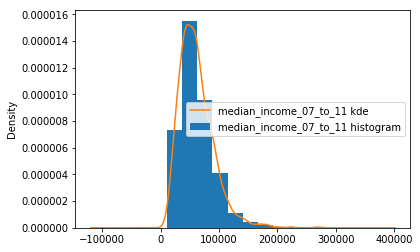

In [74]:
df_combined['median_income_07_to_11'].plot.hist(normed=True, label = 'median_income_07_to_11 histogram')
df_combined['median_income_07_to_11'].plot.kde(label ='median_income_07_to_11 kde')
plt.legend()
plt.show()

/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


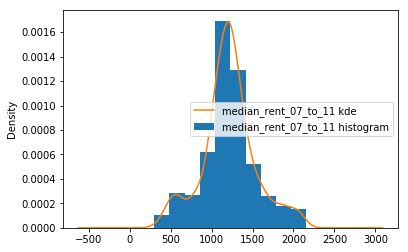

In [75]:
df_combined['median_rent_07_to_11'].plot.hist(normed=True, label = 'median_rent_07_to_11 histogram')
df_combined['median_rent_07_to_11'].plot.kde(label ='median_rent_07_to_11 kde')
plt.legend()
plt.show()

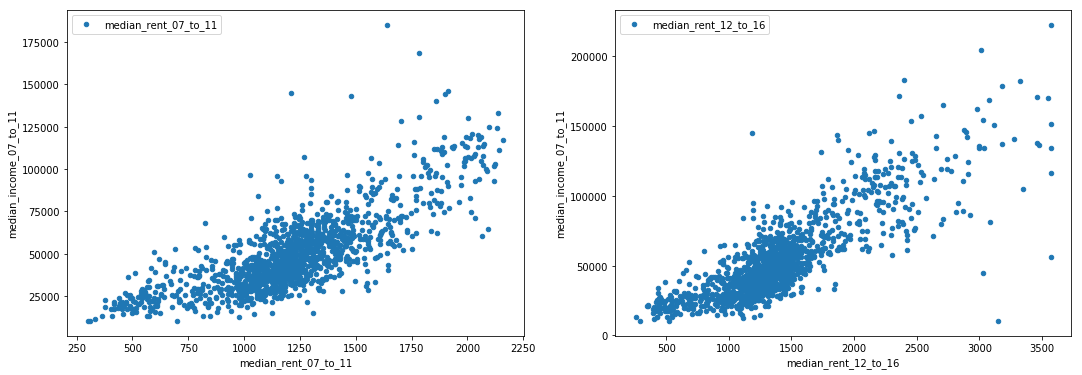

In [76]:
fig, axs = plt.subplots(1, 2, sharey=False, figsize=(18, 6))
for idx, dollars in enumerate(['median_rent_07_to_11', 'median_rent_12_to_16']):
    df_combined.plot(kind='scatter', x=dollars, y='median_income_07_to_11', ax=axs[idx], label=dollars)
plt.legend()
plt.show()

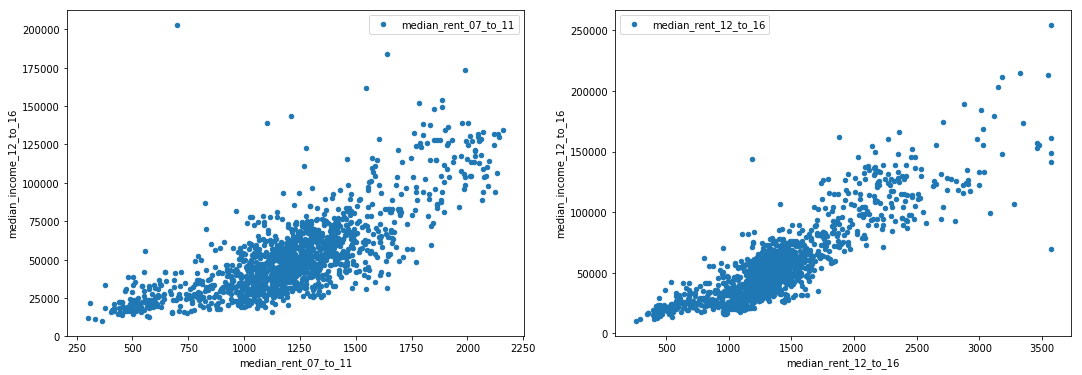

In [77]:
fig, axs = plt.subplots(1, 2, sharey=False, figsize=(18, 6))
for idx, dollars in enumerate(['median_rent_07_to_11', 'median_rent_12_to_16']):
    df_combined.plot(kind='scatter', x=dollars, y='median_income_12_to_16', ax=axs[idx], label=dollars)
plt.legend()
plt.show()

$$\(\hat{y} = \text{Intercept} + C(famhist)[T.Present] \times I(\text{famhist} = \text{Present})\)$$

In [78]:
test

(1.3136940504759202, 0.00015517207744427015, 'increasing')

In [79]:
df_key = pd.read_csv("df_key2.csv")

In [80]:
df_key.head()

,Unnamed: 0,Unnamed: 0.1,borough,ct2010,zipcode,NTA_code,NTA_name,match_id,2010 Census Bureau FIPS County Code,2010 NYC Borough Code,2010 Census Tract,PUMA
0,0,0,QN,1099.00,11361.0,QN46,Bayside-Bayside Hills,QN1099.0,81.0,4.0,1099.0,4104.0
1,1,2,SI,277.02,10314.0,NaN,NaN,SI277.02,NaN,NaN,NaN,NaN
2,2,3,BK,546.00,11210.0,BK43,Midwood,BK546.0,47.0,3.0,546.0,4015.0
3,3,5,BK,552.00,11229.0,BK44,Madison,BK552.0,47.0,3.0,552.0,4016.0
4,4,6,QN,595.00,11385.0,QN20,Ridgewood,QN595.0,81.0,4.0,595.0,4110.0


In [81]:
#df_combined[df_combined['census_tract'].str == 36061020901]

In [82]:
df_combined.head()

,census_tract,median_income_07_to_11,median_income_12_to_16,median_rent_07_to_11,median_rent_12_to_16
0,36061020901,26868.476413,22646.768705,558.246877,820.756744
1,36061021000,37333.166423,30517.876863,757.698189,946.164297
2,36061021100,56176.979469,47939.330891,1029.775793,1140.902853
3,36061021200,60259.227509,55064.111177,1142.509143,1532.419114
4,36061021303,46358.338272,37478.505800,1057.959131,1258.153817


In [89]:
df_master = pd.read_csv("df_master.csv")

In [90]:
df_master

,Unnamed: 0,zipcode,median_income,mean_income,population,City_zill,State_zill,Metro_zill,CountyName_zill,SizeRank_zill,...,2018-05_zill,2018-06_zill,2018-07_zill,2018-08_zill,2018-09_zill,2018-10_zill,2018-11_zill,2018-12_zill,2019-01_zill,restaurant_count
0,0,10001,71244.6100,123112.7764,17678,New York,NY,New York-Newark-Jersey City,New York County,1297.0,...,3470.0,3387.5,3387.5,3370.0,3348.0,3400.0,3370.0,3348.0,3400.0,488.0
1,1,10002,30843.9574,46258.6118,70878,New York,NY,New York-Newark-Jersey City,New York County,9.0,...,3250.0,3195.0,3125.0,3200.0,3199.0,3112.5,3112.5,3125.0,3050.0,509.0
2,2,10003,89998.5339,139330.9968,53609,New York,NY,New York-Newark-Jersey City,New York County,45.0,...,3800.0,3725.0,3700.0,3800.0,3800.0,3800.0,3800.0,3800.0,3750.0,682.0
3,3,10004,110183.6857,156682.7615,1271,New York,NY,New York-Newark-Jersey City,New York County,3370.0,...,4000.0,4000.0,3995.0,3972.5,3995.0,4110.0,4010.0,3995.0,3876.0,145.0
4,4,10005,115133.2855,163762.6601,1517,New York,NY,New York-Newark-Jersey City,New York County,3250.0,...,3995.0,3897.5,3907.5,3995.0,3995.0,3995.0,3910.0,3900.0,3910.0,72.0
5,5,10006,111220.0000,156776.0000,972,New York,NY,New York-Newark-Jersey City,New York County,3363.0,...,3645.0,3485.0,3595.0,3500.0,3672.5,3550.0,3600.0,3700.0,3700.0,45.0
6,6,10007,145458.7823,256235.5719,3520,New York,NY,New York-Newark-Jersey City,New York County,3354.0,...,5695.0,5400.0,5067.0,5100.0,5342.0,5695.0,5795.0,5845.0,6325.0,141.0
7,7,10009,56615.2777,78138.2679,56975,New York,NY,New York-Newark-Jersey City,New York County,22.0,...,3400.0,3462.5,3422.5,3400.0,3495.0,3447.5,3320.0,3315.0,3350.0,311.0
8,8,10010,93702.0061,137105.7060,27322,New York,NY,New York-Newark-Jersey City,New York County,749.0,...,3695.0,3597.5,3600.0,3500.0,3500.0,3495.0,3497.5,3450.0,3500.0,259.0
9,9,10011,92359.4888,160936.5432,45899,New York,NY,New York-Newark-Jersey City,New York County,24.0,...,3695.0,3695.0,3725.0,3750.0,3800.0,3800.0,3750.0,3688.5,3695.0,455.0


In [118]:
model4 = smf.ols(formula='median_income ~ restaurant_count*population+population + restaurant_count', 
                 data=df_master).fit()

In [119]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          median_income   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     18.17
Date:                Thu, 07 Mar 2019   Prob (F-statistic):           2.41e-10
Time:                        10:01:40   Log-Likelihood:                -2103.1
No. Observations:                 184   AIC:                             4214.
Df Residuals:                     180   BIC:                             4227.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                    7.424e+04   4324.058     17.169      0.000    6.57e+04    8.28e+04
restaurant_count               30.2310     25.857      1.169      0.244     -20.791      81.252
population                     -0.5515      0.111     -4.985      0.000      -0.770      -0.333
restaurant_count:population     0.0005      0.001      0.897      0.371      -0.001       0.002
==============================================================================
Omnibus:                        6.803   Durbin-Watson:                   1.448
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                7.046
Skew:                           0.344   Prob(JB):                       0.0295
Kurtosis:                       3.668   Cond. No.                     2.72e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.72e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


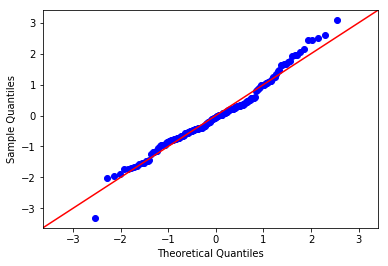

In [98]:
residual4 = model4.resid
fig = sm.graphics.qqplot(residual4, dist=stats.norm, line='45', fit=True)
fig.show()

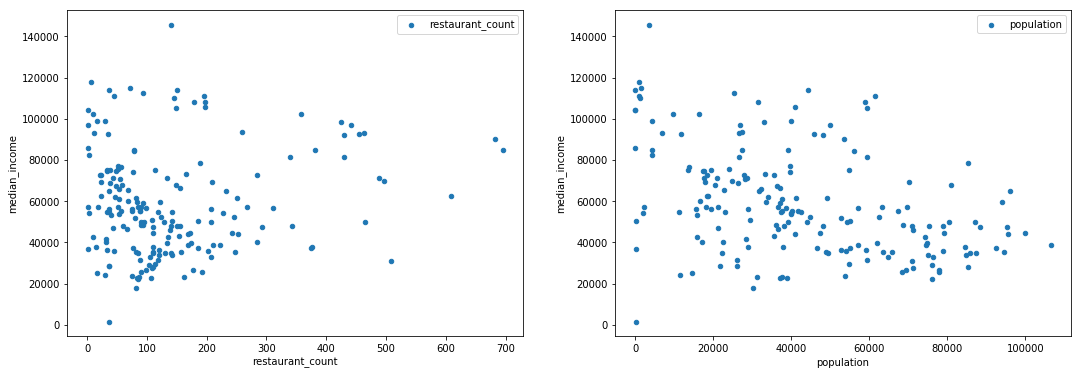

In [105]:
fig, axs = plt.subplots(1, 2, sharey=False, figsize=(18, 6))
for idx, dollars in enumerate(['restaurant_count', 'population']):
    df_master.plot(kind='scatter', x=dollars, y='median_income', ax=axs[idx], label=dollars)
plt.legend()
plt.show()

/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


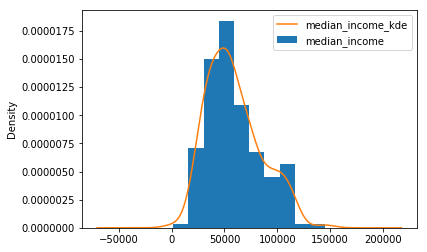

In [106]:
df_master['median_income'].plot.hist(normed=True, label = 'median_income')
df_master['median_income'].plot.kde(label ='median_income_kde')
plt.legend()
plt.show()

In [126]:
model5 = smf.ols(formula='median_income ~ restaurant_count*population+population + restaurant_count', 
                 data=df_master).fit()

In [127]:
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          median_income   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     18.17
Date:                Thu, 07 Mar 2019   Prob (F-statistic):           2.41e-10
Time:                        10:58:15   Log-Likelihood:                -2103.1
No. Observations:                 184   AIC:                             4214.
Df Residuals:                     180   BIC:                             4227.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                    7.424e+04   4324.058     17.169      0.000    6.57e+04    8.28e+04
restaurant_count               30.2310     25.857      1.169      0.244     -20.791      81.252
population                     -0.5515      0.111     -4.985      0.000      -0.770      -0.333
restaurant_count:population     0.0005      0.001      0.897      0.371      -0.001       0.002
==============================================================================
Omnibus:                        6.803   Durbin-Watson:                   1.448
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                7.046
Skew:                           0.344   Prob(JB):                       0.0295
Kurtosis:                       3.668   Cond. No.                     2.72e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.72e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [122]:
df_master94 = pd.read_csv("df_master94.csv")

In [143]:
df_master94.rename(columns={'2019-01_zill':'median_rent'},inplace=True)

In [144]:
df_master94.columns

Index(['Unnamed: 0', 'zipcode', 'median_income', 'population',
       'CountyName_zill', 'median_rent', 'restaurant_count',
       'recycling_bin_count', 'num_subway_entrances', 'subway_bracket'],
      dtype='object')

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


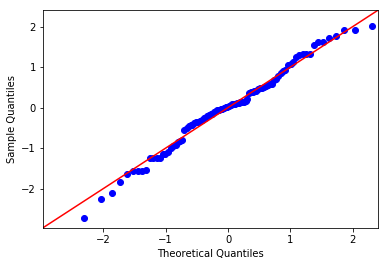

In [173]:
residual6 = model6.resid
fig = sm.graphics.qqplot(residual6, dist=stats.norm, line='45', fit=True)
fig.show()

In [192]:
model6 = smf.ols(formula='median_income ~ C(subway_bracket)+median_rent+recycling_bin_count*population+restaurant_count*population+population + restaurant_count', 
                 data=df_master94).fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          median_income   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     11.46
Date:                Thu, 07 Mar 2019   Prob (F-statistic):           6.87e-11
Time:                        11:32:47   Log-Likelihood:                -1057.4
No. Observations:                  94   AIC:                             2133.
Df Residuals:                      85   BIC:                             2156.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                       2.271e+04   1.19e+04      1.905      0.060    -989.749    4.64e+04
C(subway_bracket)[T.(6, 72]]    -372.6169   5773.464     -0.065      0.949   -1.19e+04    1.11e+04
C(subway_bracket)[T.0]          1.068e+04   6346.911      1.682      0.096   -1942.151    2.33e+04
median_rent                       20.4277      3.257      6.272      0.000      13.952      26.904
recycling_bin_count             -976.8055   1618.640     -0.603      0.548   -4195.096    2241.485
population                        -0.2233      0.168     -1.327      0.188      -0.558       0.111
recycling_bin_count:population     0.0010      0.032      0.030      0.976      -0.063       0.065
restaurant_count                 -31.9594     28.793     -1.110      0.270     -89.208      25.289
restaurant_count:population        0.0005      0.001      0.639      0.524      -0.001       0.002
==============================================================================
Omnibus:                        0.762   Durbin-Watson:                   1.573
Prob(Omnibus):                  0.683   Jarque-Bera (JB):                0.785
Skew:                          -0.208   Prob(JB):                        0.675
Kurtosis:                       2.834   Cond. No.                     7.59e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.59e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [146]:
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          median_income   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     11.46
Date:                Thu, 07 Mar 2019   Prob (F-statistic):           6.87e-11
Time:                        11:08:07   Log-Likelihood:                -1057.4
No. Observations:                  94   AIC:                             2133.
Df Residuals:                      85   BIC:                             2156.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                       2.271e+04   1.19e+04      1.905      0.060    -989.749    4.64e+04
C(subway_bracket)[T.(6, 72]]    -372.6169   5773.464     -0.065      0.949   -1.19e+04    1.11e+04
C(subway_bracket)[T.0]          1.068e+04   6346.911      1.682      0.096   -1942.151    2.33e+04
median_rent                       20.4277      3.257      6.272      0.000      13.952      26.904
recycling_bin_count             -976.8055   1618.640     -0.603      0.548   -4195.096    2241.485
recycling_bin_count:population     0.0010      0.032      0.030      0.976      -0.063       0.065
restaurant_count                 -31.9594     28.793     -1.110      0.270     -89.208      25.289
population                        -0.2233      0.168     -1.327      0.188      -0.558       0.111
restaurant_count:population        0.0005      0.001      0.639      0.524      -0.001       0.002
==============================================================================
Omnibus:                        0.762   Durbin-Watson:                   1.573
Prob(Omnibus):                  0.683   Jarque-Bera (JB):                0.785
Skew:                          -0.208   Prob(JB):                        0.675
Kurtosis:                       2.834   Cond. No.                     7.59e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.59e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [168]:
model7 = smf.ols(formula='median_income~median_rent', 
                 data=df_master94).fit()
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          median_income   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     69.97
Date:                Thu, 07 Mar 2019   Prob (F-statistic):           6.24e-13
Time:                        11:14:43   Log-Likelihood:                -1065.2
No. Observations:                  94   AIC:                             2134.
Df Residuals:                      92   BIC:                             2140.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.172e+04   6708.390      1.747      0.084   -1604.564     2.5e+04
median_rent    19.8231      2.370      8.365      0.000      15.117      24.530
==============================================================================
Omnibus:                        0.165   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.921   Jarque-Bera (JB):                0.236
Skew:                          -0.096   Prob(JB):                        0.889
Kurtosis:                       2.848   Cond. No.                     9.02e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [164]:
model8 = smf.ols(formula='median_rent ~ recycling_bin_count*population', 
                 data=df_master94).fit()
model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            median_rent   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     11.76
Date:                Thu, 07 Mar 2019   Prob (F-statistic):           1.42e-06
Time:                        11:12:55   Log-Likelihood:                -756.04
No. Observations:                  94   AIC:                             1520.
Df Residuals:                      90   BIC:                             1530.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                       2889.7624    233.614     12.370      0.000    2425.648    3353.877
recycling_bin_count              176.9867     58.882      3.006      0.003      60.007     293.967
population                        -0.0090      0.004     -2.021      0.046      -0.018      -0.000
recycling_bin_count:population    -0.0025      0.001     -2.133      0.036      -0.005      -0.000
==============================================================================
Omnibus:                        5.797   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.055   Jarque-Bera (JB):                5.135
Skew:                           0.498   Prob(JB):                       0.0767
Kurtosis:                       3.564   Cond. No.                     6.87e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.87e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [181]:
residual94 = model94.resid
fig = sm.graphics.qqplot(residual94, dist=stats.norm, line='45', fit=True)
fig.show()

NameError: name 'model94' is not defined

In [178]:
df_master94.columns

Index(['Unnamed: 0', 'zipcode', 'median_income', 'population',
       'CountyName_zill', 'median_rent', 'restaurant_count',
       'recycling_bin_count', 'num_subway_entrances', 'subway_bracket'],
      dtype='object')

In [186]:
df_master94['rent_over_income'] = df_master94['median_rent']*12/df_master94['median_income']

Unnamed: 0              0
zipcode                 0
median_income           0
population              0
CountyName_zill         0
median_rent             0
restaurant_count        0
recycling_bin_count     0
num_subway_entrances    0
subway_bracket          0
dtype: int64

In [181]:
residual94 = model94.resid
fig = sm.graphics.qqplot(residual94, dist=stats.norm, line='45', fit=True)
fig.show()

NameError: name 'model94' is not defined

In [195]:
model6 = smf.ols(formula='median_income ~ C(subway_bracket)+C(subway_bracket)*restaurant_count*population+median_rent+recycling_bin_count*population+restaurant_count*population+population + restaurant_count', 
                 data=df_master94).fit()
model6.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          median_income   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     7.088
Date:                Thu, 07 Mar 2019   Prob (F-statistic):           3.24e-09
Time:                        11:34:11   Log-Likelihood:                -1053.6
No. Observations:                  94   AIC:                             2137.
Df Residuals:                      79   BIC:                             2175.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
============================================================================================================================
                                                               coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
Intercept                                                 2635.2969   1.62e+04      0.163      0.871   -2.96e+04    3.48e+04
C(subway_bracket)[T.(6, 72]]                              2.582e+04   1.56e+04      1.650      0.103   -5331.227     5.7e+04
C(subway_bracket)[T.0]                                    3.366e+04    1.8e+04      1.867      0.066   -2233.161    6.95e+04
restaurant_count                                            99.0074     62.193      1.592      0.115     -24.785     222.799
C(subway_bracket)[T.(6, 72]]:restaurant_count             -163.6079     73.471     -2.227      0.029    -309.848     -17.367
C(subway_bracket)[T.0]:restaurant_count                   -193.1418     88.223     -2.189      0.032    -368.746     -17.537
population                                                   0.1480      0.361      0.410      0.683      -0.571       0.867
C(subway_bracket)[T.(6, 72]]:population                     -0.5050      0.402     -1.257      0.212      -1.305       0.295
C(subway_bracket)[T.0]:population                           -0.5212      0.490     -1.065      0.290      -1.496       0.453
restaurant_count:population                                 -0.0020      0.002     -1.177      0.243      -0.005       0.001
C(subway_bracket)[T.(6, 72]]:restaurant_count:population     0.0030      0.002      1.585      0.117      -0.001       0.007
C(subway_bracket)[T.0]:restaurant_count:population           0.0041      0.002      1.706      0.092      -0.001       0.009
median_rent                                                 21.1699      3.305      6.406      0.000      14.592      27.748
recycling_bin_count                                      -1126.4573   1656.403     -0.680      0.498   -4423.445    2170.530
recycling_bin_count:population                               0.0037      0.033      0.112      0.911      -0.062       0.069
==============================================================================
Omnibus:                        1.827   Durbin-Watson:                   1.663
Prob(Omnibus):                  0.401   Jarque-Bera (JB):                1.693
Skew:                          -0.222   Prob(JB):                        0.429
Kurtosis:                       2.516   Cond. No.                     1.94e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.94e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [218]:
model6 = smf.ols(formula='median_income ~ C(CountyName_zill)*(C(subway_bracket)+C(subway_bracket)*restaurant_count*population+median_rent+recycling_bin_count*population+restaurant_count*population+population + restaurant_count)', data=df_master94).fit()
model6.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          median_income   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     2.122
Date:                Thu, 07 Mar 2019   Prob (F-statistic):            0.00671
Time:                        11:50:06   Log-Likelihood:                -1031.9
No. Observations:                  94   AIC:                             2168.
Df Residuals:                      42   BIC:                             2300.
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
==================================================================================================================================================================
                                                                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                      -1813.5095   2.86e+04     -0.063      0.950   -5.96e+04    5.59e+04
C(CountyName_zill)[T.Kings County]                                                             -2.949e+04   5.37e+04     -0.549      0.586   -1.38e+05    7.88e+04
C(CountyName_zill)[T.New York County]                                                          -7284.1964   2.99e+04     -0.243      0.809   -6.77e+04    5.31e+04
C(CountyName_zill)[T.Queens County]                                                             3.497e+04   5.77e+04      0.606      0.548   -8.14e+04    1.51e+05
C(CountyName_zill)[T.Richmond County]                                                              0.0003      0.000      0.585      0.562      -0.001       0.001
C(subway_bracket)[T.(6, 72]]                                                                    2.061e+04   3.03e+04      0.680      0.500   -4.05e+04    8.17e+04
C(subway_bracket)[T.0]                                                                          3.344e+04   2.99e+04      1.117      0.270    -2.7e+04    9.38e+04
C(CountyName_zill)[T.Kings County]:C(subway_bracket)[T.(6, 72]]                                -2.949e+04   5.37e+04     -0.549      0.586   -1.38e+05    7.88e+04
C(CountyName_zill)[T.New York County]:C(subway_bracket)[T.(6, 72]]                              2.128e+04   3.08e+04      0.690      0.494    -4.1e+04    8.35e+04
C(CountyName_zill)[T.Queens County]:C(subway_bracket)[T.(6, 72]]                                2.882e+04   6.34e+04      0.455      0.652   -9.91e+04    1.57e+05
C(CountyName_zill)[T.Richmond County]:C(subway_bracket)[T.(6, 72]]                                -0.0005      0.001     -0.732      0.468      -0.002       0.001
C(CountyName_zill)[T.Kings County]:C(subway_bracket)[T.0]                                         -0.0884      1.553     -0.057      0.955      -3.222       3.045
C(CountyName_zill)[T.New York County]:C(subway_bracket)[T.0]                                    2.729e+04   3.16e+04      0.863      0.393   -3.65e+04    9.11e+04
C(CountyName_zill)[T.Queens County]:C(subway_bracket)[T.0]                                      6143.9380   5.53e+04      0.111      0.912   -1.05e+05    1.18e+05
C(CountyName_zill)[T.Richmond County]:C(subway_bracket)[T.0]                                       0.0001      0.000      0.491      0.626      -0.000       0.001
restaurant_count                                                                                 142.8366    104.731      1.364      0.180     -68.51

In [200]:
df_master94.CountyName_zill = df_master94.CountyName_zill.astype('category')

In [202]:
df_master94.head()

,Unnamed: 0,zipcode,median_income,population,CountyName_zill,median_rent,restaurant_count,recycling_bin_count,num_subway_entrances,subway_bracket,rent_over_income
0,0,10001,71244.6100,17678,New York County,3400.0,488.0,1.0,51.0,"(6, 72]",0.572675
1,1,10002,30843.9574,70878,New York County,3050.0,509.0,10.0,19.0,"(6, 72]",1.186618
2,2,10003,89998.5339,53609,New York County,3750.0,682.0,7.0,28.0,"(6, 72]",0.500008
3,3,10004,110183.6857,1271,New York County,3876.0,145.0,3.0,6.0,"(0, 6]",0.422131
4,4,10005,115133.2855,1517,New York County,3910.0,72.0,3.0,0.0,0,0.407528


In [203]:
model10 = smf.ols(formula='median_income ~ C(CountyName_zill)+C(subway_bracket)+C(subway_bracket)*restaurant_count*population+median_rent+recycling_bin_count*population+restaurant_count*population+population + restaurant_count', 
                 data=df_master94).fit()
model10.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          median_income   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     5.990
Date:                Thu, 07 Mar 2019   Prob (F-statistic):           1.25e-08
Time:                        11:38:49   Log-Likelihood:                -1049.9
No. Observations:                  94   AIC:                             2138.
Df Residuals:                      75   BIC:                             2186.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
============================================================================================================================
                                                               coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
Intercept                                                 1.046e+04   1.79e+04      0.583      0.562   -2.53e+04    4.62e+04
C(CountyName_zill)[T.Kings County]                       -8100.6070   9591.878     -0.845      0.401   -2.72e+04     1.1e+04
C(CountyName_zill)[T.New York County]                    -9614.0228   9942.643     -0.967      0.337   -2.94e+04    1.02e+04
C(CountyName_zill)[T.Queens County]                      -1.035e+04   9658.640     -1.071      0.288   -2.96e+04    8895.466
C(CountyName_zill)[T.Richmond County]                     1.275e+04   1.16e+04      1.096      0.277   -1.04e+04    3.59e+04
C(subway_bracket)[T.(6, 72]]                              2.728e+04   1.56e+04      1.747      0.085   -3833.536    5.84e+04
C(subway_bracket)[T.0]                                    3.428e+04   1.83e+04      1.871      0.065   -2210.306    7.08e+04
restaurant_count                                            87.3100     62.770      1.391      0.168     -37.734     212.354
C(subway_bracket)[T.(6, 72]]:restaurant_count             -162.1643     74.602     -2.174      0.033    -310.780     -13.549
C(subway_bracket)[T.0]:restaurant_count                   -172.1547     87.616     -1.965      0.053    -346.695       2.386
population                                                  -0.1368      0.387     -0.354      0.725      -0.908       0.634
C(subway_bracket)[T.(6, 72]]:population                     -0.2940      0.410     -0.717      0.476      -1.111       0.523
C(subway_bracket)[T.0]:population                           -0.2654      0.498     -0.533      0.596      -1.258       0.727
restaurant_count:population                                 -0.0007      0.002     -0.370      0.713      -0.004       0.003
C(subway_bracket)[T.(6, 72]]:restaurant_count:population     0.0021      0.002      1.072      0.287      -0.002       0.006
C(subway_bracket)[T.0]:restaurant_count:population           0.0026      0.002      1.059      0.293      -0.002       0.008
median_rent                                                 21.5180      3.651      5.894      0.000      14.245      28.791
recycling_bin_count                                       -757.3678   1696.898     -0.446      0.657   -4137.763    2623.027
recycling_bin_count:population                              -0.0127      0.034     -0.367      0.714      -0.081       0.056
==============================================================================
Omnibus:                        0.209   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.901   Jarque-Bera (JB):                0.367
Skew:                          -0.085   Prob(JB):                        0.832
Kurtosis:        

In [219]:
model11 = smf.ols(formula=
                  'median_income ~ C(CountyName_zill)+C(CountyName_zill)*C(subway_bracket)+C(subway_bracket)*restaurant_count*population+median_rent+C(CountyName_zill)*recycling_bin_count*population+C(CountyName_zill)*restaurant_count*population+population + restaurant_count', 
                 data=df_master94).fit()
model11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          median_income   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     2.603
Date:                Thu, 07 Mar 2019   Prob (F-statistic):           0.000622
Time:                        13:48:55   Log-Likelihood:                -1038.0
No. Observations:                  94   AIC:                             2162.
Df Residuals:                      51   BIC:                             2271.
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
========================================================================================================================================
                                                                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                            -3.371e+04   7.24e+04     -0.466      0.643   -1.79e+05    1.12e+05
C(CountyName_zill)[T.Kings County]                                   -3.204e+04   8.07e+04     -0.397      0.693   -1.94e+05     1.3e+05
C(CountyName_zill)[T.New York County]                                 3.387e+04   7.35e+04      0.461      0.647   -1.14e+05    1.81e+05
C(CountyName_zill)[T.Queens County]                                   4.295e+04   7.42e+04      0.578      0.565   -1.06e+05    1.92e+05
C(CountyName_zill)[T.Richmond County]                                -8487.0957   2.38e+04     -0.357      0.723   -5.62e+04    3.93e+04
C(subway_bracket)[T.(6, 72]]                                         -8.364e+04    3.2e+05     -0.261      0.795   -7.27e+05     5.6e+05
C(subway_bracket)[T.0]                                               -5.161e+04    2.7e+05     -0.191      0.849   -5.93e+05     4.9e+05
C(CountyName_zill)[T.Kings County]:C(subway_bracket)[T.(6, 72]]       9.996e+04   3.18e+05      0.314      0.755   -5.39e+05    7.38e+05
C(CountyName_zill)[T.New York County]:C(subway_bracket)[T.(6, 72]]    1.177e+05   3.19e+05      0.369      0.714   -5.23e+05    7.58e+05
C(CountyName_zill)[T.Queens County]:C(subway_bracket)[T.(6, 72]]      7.875e+04    3.2e+05      0.246      0.807   -5.64e+05    7.21e+05
C(CountyName_zill)[T.Richmond County]:C(subway_bracket)[T.(6, 72]]    8.916e+04    2.5e+05      0.357      0.723   -4.13e+05    5.91e+05
C(CountyName_zill)[T.Kings County]:C(subway_bracket)[T.0]             7.152e+04    2.7e+05      0.265      0.792    -4.7e+05    6.13e+05
C(CountyName_zill)[T.New York County]:C(subway_bracket)[T.0]          1.069e+05   2.69e+05      0.397      0.693   -4.34e+05    6.48e+05
C(CountyName_zill)[T.Queens County]:C(subway_bracket)[T.0]             6.57e+04    2.7e+05      0.243      0.809   -4.77e+05    6.09e+05
C(CountyName_zill)[T.Richmond County]:C(subway_bracket)[T.0]         -1.493e+04   4.19e+04     -0.357      0.723    -9.9e+04    6.91e+04
restaurant_count                                                      2081.5743   5565.847      0.374      0.710   -9092.330    1.33e+04
C(subway_bracket)[T.(6, 72]]:restaurant_count                         -217.2319     98.243     -2.211      0.032    -414.463     -20.001
C(subway_bracket)[T.0]:restaurant_count                               -294.0785    116.949     -2.515      0.015    -528.864     -59.293
C(CountyName_zill)[T.Kings County]:restaurant_count                  -1553.7526   5565.290     -0.279      0.781   -1.27e+04    9619.033
C(CountyName_zill)[T.New York County]:restaurant_count               